In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [17]:
# Scrape a single match shots
base_url = 'https://understat.com/match/'
# Type the match id
#match = str(input('Please enter the match id: '))
match = '15790' 
url = base_url+match

In [18]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content)
scripts = soup.find_all('script')

In [19]:
#get only the shotsData
strings = scripts[1].string

In [20]:
strings[0:1000]

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22421999\\x22,\\x22minute\\x22\\x3A\\x2210\\x22,\\x22result\\x22\\x3A\\x22BlockedShot\\x22,\\x22X\\x22\\x3A\\x220.955999984741211\\x22,\\x22Y\\x22\\x3A\\x220.46099998474121096\\x22,\\x22xG\\x22\\x3A\\x220.5939980745315552\\x22,\\x22player\\x22\\x3A\\x22Dejan\\x20Kulusevski\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x226691\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222020\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2215790\\x22,\\x22h_team\\x22\\x3A\\x22Juventus\\x22,\\x22a_team\\x22\\x3A\\x22Inter\\x22,\\x22h_goals\\x22\\x3A\\x223\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222021\\x2D05\\x2D15\\x2016\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Federico\\x20Chiesa\\x22,\\x22lastAction\\x22\\x3A\\x22HeadPass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22422000\\x22,\\x22minute\\x22\\x3A\\x2210\\x22,\\x22resu

In [21]:
# Strip unnecessary symbols and get only JSON data 
str_start = strings.index("('")+2 
str_end = strings.index("')") 
json_data = strings[str_start:str_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# Convert string to JSON
data = json.loads(json_data)

In [22]:
# The JSON consists of home (h) and away (a) objects

data['h'][0]

{'id': '421999',
 'minute': '10',
 'result': 'BlockedShot',
 'X': '0.955999984741211',
 'Y': '0.46099998474121096',
 'xG': '0.5939980745315552',
 'player': 'Dejan Kulusevski',
 'h_a': 'h',
 'player_id': '6691',
 'situation': 'OpenPlay',
 'season': '2020',
 'shotType': 'RightFoot',
 'match_id': '15790',
 'h_team': 'Juventus',
 'a_team': 'Inter',
 'h_goals': '3',
 'a_goals': '2',
 'date': '2021-05-15 16:00:00',
 'player_assisted': 'Federico Chiesa',
 'lastAction': 'HeadPass'}

In [23]:
# The JSON consists of home (h) and away (a) objects

data['a'][0]

{'id': '422001',
 'minute': '15',
 'result': 'BlockedShot',
 'X': '0.9169999694824219',
 'Y': '0.4759999847412109',
 'xG': '0.09226127713918686',
 'player': 'Romelu Lukaku',
 'h_a': 'a',
 'player_id': '594',
 'situation': 'FromCorner',
 'season': '2020',
 'shotType': 'Head',
 'match_id': '15790',
 'h_team': 'Juventus',
 'a_team': 'Inter',
 'h_goals': '3',
 'a_goals': '2',
 'date': '2021-05-15 16:00:00',
 'player_assisted': 'Marcelo Brozovic',
 'lastAction': 'Cross'}

In [24]:
# Separate home and away teams into different DataFrames

from pandas import json_normalize

data_all = json_normalize(data, sep = "_")
data_home = json_normalize(data['h'], sep = "_")
data_away = json_normalize(data['a'], sep = "_")

In [25]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,422001,15,BlockedShot,0.9169999694824219,0.4759999847412109,0.09226127713918686,Romelu Lukaku,a,594,FromCorner,2020,Head,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Marcelo Brozovic,Cross
1,422007,34,Goal,0.885,0.5,0.7612988352775574,Romelu Lukaku,a,594,Penalty,2020,LeftFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Standard
2,422012,50,MissedShots,0.874000015258789,0.6819999694824219,0.0534907728433609,Lautaro Martínez,a,7006,OpenPlay,2020,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Christian Eriksen,Pass
3,422013,57,SavedShot,0.705999984741211,0.41200000762939454,0.038102034479379654,Christian Eriksen,a,646,DirectFreekick,2020,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Standard
4,422014,75,MissedShots,0.8690000152587891,0.675,0.0560557022690773,Ivan Perisic,a,448,OpenPlay,2020,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Lautaro Martínez,Pass


In [26]:
#df['cum_away_shots'] = df['away_shots'].cumsum()
#df["A"] = pd.to_numeric(df["A"], downcast="float")

#Converting from string to float
data_home['xG'] = pd.to_numeric(data_home['xG'], downcast="float")
data_away['xG'] = pd.to_numeric(data_away['xG'], downcast="float")

#Converting from string to int
data_home['minute'] = pd.to_numeric(data_home['minute'], downcast="integer")
data_away['minute'] = pd.to_numeric(data_away['minute'], downcast="integer")

#Getting a column with cumulative result
data_home['cumsum_xg'] = data_home['xG'].cumsum()
data_away['cumsum_xg'] = data_away['xG'].cumsum()

In [32]:
data_home

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,421999,10,BlockedShot,0.955999984741211,0.46099998474121096,0.593998,Dejan Kulusevski,h,6691,OpenPlay,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Federico Chiesa,HeadPass,0.593998
1,422000,10,MissedShots,0.8680000305175781,0.40900001525878904,0.052742,Federico Chiesa,h,1433,FromCorner,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Juan Cuadrado,Pass,0.646740
2,422002,20,BlockedShot,0.8869999694824219,0.6630000305175782,0.074645,Federico Chiesa,h,1433,OpenPlay,...,LeftFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Cristiano Ronaldo,Pass,0.721384
3,422003,20,BlockedShot,0.914000015258789,0.600999984741211,0.097888,Dejan Kulusevski,h,6691,OpenPlay,...,LeftFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Rebound,0.819273
4,422004,23,SavedShot,0.885,0.5,0.761299,Cristiano Ronaldo,h,2371,Penalty,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Standard,1.580571
5,422005,23,Goal,0.9390000152587891,0.5279999923706055,0.601596,Cristiano Ronaldo,h,2371,SetPiece,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Rebound,2.182168
6,422006,31,MissedShots,0.7809999847412109,0.325,0.024203,Danilo,h,2244,OpenPlay,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Dejan Kulusevski,Pass,2.206371
7,422008,41,MissedShots,0.91,0.4420000076293945,0.430843,Danilo,h,2244,OpenPlay,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,BallTouch,2.637213
8,422009,42,BlockedShot,0.794000015258789,0.7019999694824218,0.022063,Federico Chiesa,h,1433,SetPiece,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Juan Cuadrado,Pass,2.659276
9,422010,45,SavedShot,0.965,0.5359999847412109,0.124517,Adrien Rabiot,h,3291,OpenPlay,...,Head,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Danilo,Aerial,2.783793


In [28]:
data_away.head(5)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,...,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction,cumsum_xg
0,422001,15,BlockedShot,0.9169999694824219,0.4759999847412109,0.092261,Romelu Lukaku,a,594,FromCorner,...,Head,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Marcelo Brozovic,Cross,0.092261
1,422007,34,Goal,0.885,0.5,0.761299,Romelu Lukaku,a,594,Penalty,...,LeftFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Standard,0.853560
2,422012,50,MissedShots,0.874000015258789,0.6819999694824219,0.053491,Lautaro Martínez,a,7006,OpenPlay,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Christian Eriksen,Pass,0.907051
3,422013,57,SavedShot,0.705999984741211,0.41200000762939454,0.038102,Christian Eriksen,a,646,DirectFreekick,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Standard,0.945153
4,422014,75,MissedShots,0.8690000152587891,0.675,0.056056,Ivan Perisic,a,448,OpenPlay,...,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,Lautaro Martínez,Pass,1.001209


In [29]:
# Creating a df with the data we need only
home_df = data_home[['minute', 'cumsum_xg']]
away_df = data_away[['minute', 'cumsum_xg']]

# Creating objects for home/away minutes and xG
# Setting the 1st elements to zero, so the step chart start from zero position in both teams
h_min = [0]
a_min = [0]
h_xg = [0.0]
a_xg = [0.0]

# Adding to the lists above all the minutes and xG for home team
for x in range(len(home_df['minute'])):
    h_xg.append(home_df['cumsum_xg'].iloc[x])
    h_min.append(home_df['minute'].iloc[x])

# Adding to the lists above all the minutes and xG for away team
for x in range(len(away_df['minute'])):
    a_xg.append(away_df['cumsum_xg'].iloc[x])
    a_min.append(away_df['minute'].iloc[x])


In [30]:
a_xg, a_min

([0.0,
  0.09226128,
  0.8535601,
  0.90705085,
  0.9451529,
  1.0012085,
  1.0642884,
  1.2975909,
  1.3438201],
 [0, 15, 34, 50, 57, 75, 76, 81, 91])

Text(0.5, 1.0, 'Juventus (white) vs Inter (red) 3:2')

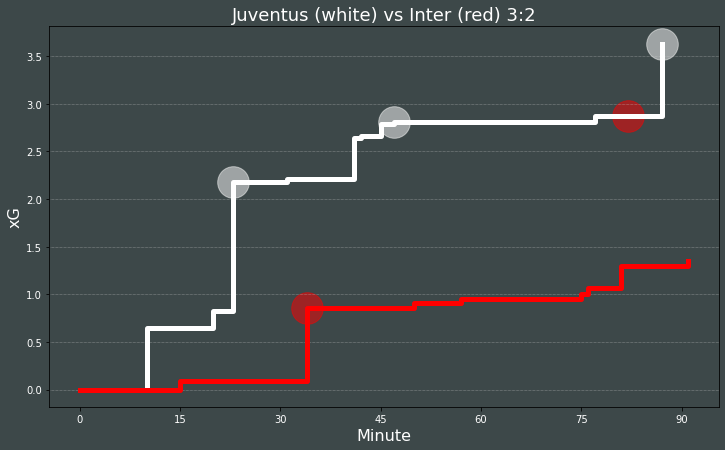

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

plt.xticks([0,15,30,45,60,75,90], color='white')
plt.yticks(color='white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)

'''
#plot the step graphs
ax.step(x=data_home['minute'],y=data_home['cumsum_xg'],color='white',linewidth=5)
ax.step(x=data_away['minute'],y=data_away['cumsum_xg'],color='red',linewidth=5)
'''

# Passing our lists to step object to plot the chart
ax.step(x=h_min,y=h_xg,color='white',linewidth=5, where='post')
ax.step(x=a_min,y=a_xg,color='red',linewidth=5, where='post') #check the where option

# Displaying scatter plots when goals were scored for home team
for i in range(len(data_home['id'])):
    if data_home.iloc[i]['result'] == 'Goal':
        ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='white', s=1000, marker='o', alpha=0.5)
    if data_home.iloc[i]['result'] == 'OwnGoal':
        ax.scatter(data_home.iloc[i]['minute'], data_home.iloc[i]['cumsum_xg'], color='red', s=1000, marker='o', alpha=0.5)

# Displaying scatter plots when goals were scored for away team
for i in range(len(data_away['id'])):
    if data_away.iloc[i]['result'] == 'Goal':
        ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='red', s=1000, marker='o', alpha=0.5)
    if data_away.iloc[i]['result'] == 'OwnGoal':
        ax.scatter(data_away.iloc[i]['minute'], data_away.iloc[i]['cumsum_xg'], color='white', s=1000, marker='o', alpha=0.5)

plt.title(data_home.iloc[0]['h_team'] + ' (white) vs ' + data_home.iloc[0]['a_team'] + ' (red) ' +\
          str(data_home.iloc[0]['h_goals']) + ':' + str(data_away.iloc[0]['a_goals']), color='white', fontsize=18)

#plt.step(h_min, h_xg)
#plt.step(a_min, a_xg)